In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv('/Users/erenanbar/Desktop/data/ticketData_vs_disconnections.csv')
df.head(5)

,day,modelName,numDisconnection,maxDuration,ticket_size,total_size
0,2023-02-23,DLink DIR-853/ET,4,20.0,0,1
1,2023-02-23,DLink DIR-853/ET,15,145.0,0,1
2,2023-02-23,DLink DIR-853/ET,5,250.0,0,1
3,2023-02-23,DLink DIR-853/ET,3,60.0,0,1
4,2023-02-23,DLink DIR-853/ET,3,150.0,0,1


In [108]:
df['modelName'].value_counts()

modelName
DLink DIR-853/ET                   457372
Etisalat-S3                         97024
Arcadyan eLife Connect C1AA         92990
Technicolor MediaAccess DGA4231     11355
DLink                                 137
ETISALAT-HG6244B                       43
eLife Connect C1AA                     41
Sercomm ETISALAT-HG6244B               38
DLink pppoe                            32
DLink eth3.21                          27
etisalat_sercomm_s3_mtk_ccprpl         26
DLink 1                                17
DLink eth3.24                           3
DLink eth3                              2
DLink static                            1
Name: count, dtype: int64

In [109]:
df1 = df.loc[(df['modelName'] == 'DLink DIR-853/ET') | 
             (df['modelName'] == 'Etisalat-S3') | 
             (df['modelName'] == 'Arcadyan eLife Connect C1AA') | 
             (df['modelName'] == 'Technicolor MediaAccess DGA4231')]
df1['modelName'].value_counts()


modelName
DLink DIR-853/ET                   457372
Etisalat-S3                         97024
Arcadyan eLife Connect C1AA         92990
Technicolor MediaAccess DGA4231     11355
Name: count, dtype: int64

In [110]:
df1.describe(percentiles = [0.25,0.50,0.75,0.85,0.95,0.99])

,numDisconnection,maxDuration,ticket_size,total_size
count,658741.000000,658741.000000,658741.000000,658741.000000
mean,6.277174,290.150469,0.035609,14.636543
std,14.778042,241.912670,0.652001,198.789099
min,1.000000,0.000000,0.000000,1.000000
25%,2.000000,135.000000,0.000000,1.000000
50%,3.000000,185.000000,0.000000,1.000000
75%,5.000000,385.000000,0.000000,2.000000
85%,8.000000,555.000000,0.000000,4.000000
95%,21.000000,855.000000,0.000000,14.000000
99%,60.000000,1000.000000,1.000000,88.000000


Text(0, 0.5, 'freq')

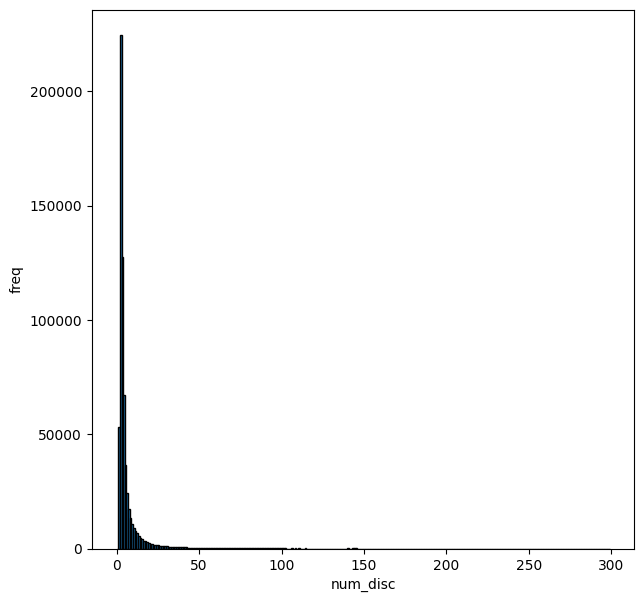

In [111]:
plt.figure(figsize = (7,7)) 
plt.hist(df['numDisconnection'], bins=range(0,300,1), edgecolor = 'black')
plt.xlabel('num_disc')
plt.ylabel('freq')

Text(0, 0.5, 'freq')

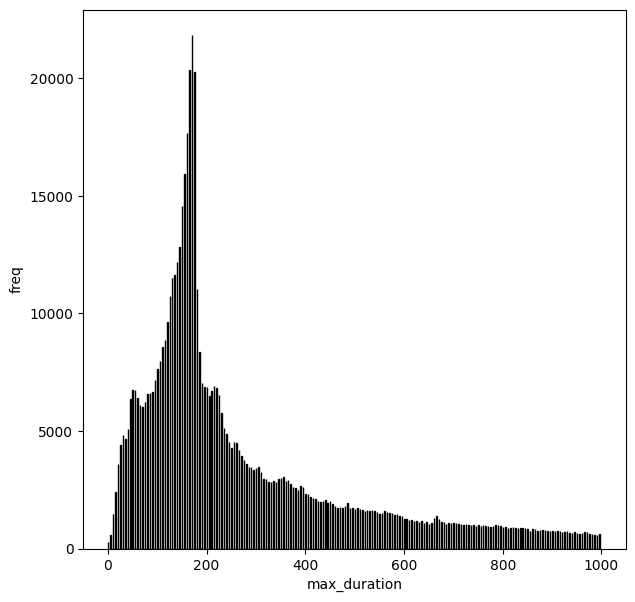

In [112]:
plt.figure(figsize = (7,7)) 
plt.hist(df['maxDuration'], bins=range(0,1000,1), edgecolor = 'black')
plt.xlabel('max_duration')
plt.ylabel('freq')

/var/folders/46/xw2_sqld4rq41nxffjb_bl140000gn/T/ipykernel_1729/822662177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bin_max_dur'] = pd.cut(df1['maxDuration'],
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


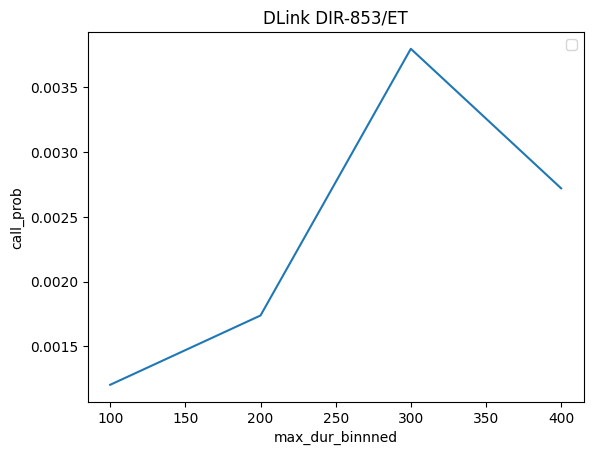

In [113]:
step = 100
stop = 500
bins_max_dur = np.arange(start = 0, stop = stop, step = step)
df1['bin_max_dur'] = pd.cut(df1['maxDuration'], 
                   bins = bins_max_dur,
                   labels = np.arange(step,stop,step))

df1_grouped_max_dur = df1.groupby(['modelName','bin_max_dur']).aggregate({'ticket_size':'sum','total_size':'sum'}).reset_index()
df1_grouped_max_dur['call_prob_max_dur'] = df1_grouped_max_dur['ticket_size']/df1_grouped_max_dur['total_size']


plt.plot(df1_grouped_max_dur.groupby('modelName').get_group('DLink DIR-853/ET')['bin_max_dur'],
         df1_grouped_max_dur.groupby('modelName').get_group('DLink DIR-853/ET')['call_prob_max_dur'])
plt.title('DLink DIR-853/ET')
plt.xlabel('max_dur_binnned')
plt.ylabel('call_prob')
plt.legend()
plt.show()

In [114]:
step = 5
stop = 56
bins_num_disc = np.arange(start = 0, stop = stop, step = step)
df1['bin_num_disc'] = pd.cut(df1['numDisconnection'], 
                   bins = bins_num_disc,
                   labels = np.arange(step,stop,step))


df1_grouped = df1.groupby(['modelName', 'bin_num_disc','bin_max_dur']).aggregate({'ticket_size':'sum','total_size':'sum'}).reset_index()
df1_grouped['call_prob_num_disc'] = df1_grouped['ticket_size']/df1_grouped['total_size']
df1_grouped

      

/var/folders/46/xw2_sqld4rq41nxffjb_bl140000gn/T/ipykernel_1729/3413125333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bin_num_disc'] = pd.cut(df1['numDisconnection'],


,modelName,bin_num_disc,bin_max_dur,ticket_size,total_size,call_prob_num_disc
0,Arcadyan eLife Connect C1AA,5,100,12,138262,0.000087
1,Arcadyan eLife Connect C1AA,5,200,7,82050,0.000085
2,Arcadyan eLife Connect C1AA,5,300,1,24278,0.000041
3,Arcadyan eLife Connect C1AA,5,400,1,14495,0.000069
4,Arcadyan eLife Connect C1AA,10,100,0,1589,0.000000
...,...,...,...,...,...,...
171,Technicolor MediaAccess DGA4231,50,400,0,0,NaN
172,Technicolor MediaAccess DGA4231,55,100,0,0,NaN
173,Technicolor MediaAccess DGA4231,55,200,0,0,NaN
174,Technicolor MediaAccess DGA4231,55,300,0,0,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


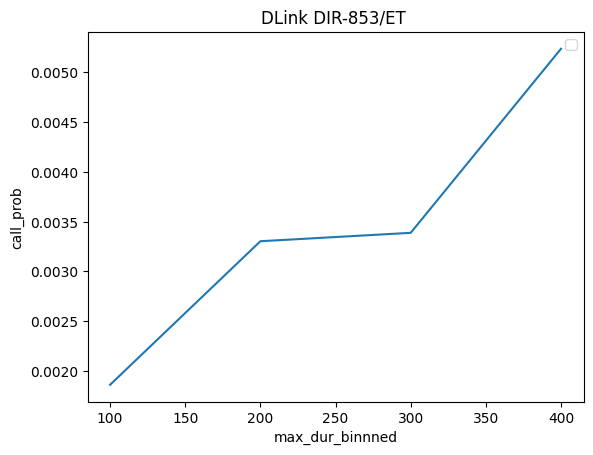

In [119]:

plt.plot(df1_grouped.loc[ (df1_grouped['modelName'] == 'DLink DIR-853/ET') & (df1_grouped['bin_num_disc'] == 10), 'bin_max_dur'],
         df1_grouped.loc[ (df1_grouped['modelName'] == 'DLink DIR-853/ET') & (df1_grouped['bin_num_disc'] == 10), 'call_prob_num_disc'])
plt.title('DLink DIR-853/ET ')
plt.xlabel('max_dur_binnned')
plt.ylabel('call_prob')
plt.legend()
plt.show()

In [ ]:
df1_grouped_num_disc = df1.groupby(['modelName','bin_num_disc']).aggregate({'ticket_size':'sum','total_size':'sum'}).reset_index()
df1_grouped_num_disc['call_prob_num_disc'] = df1_grouped_num_disc['ticket_size']/df1_grouped_num_disc['total_size']

plt.plot(df1_grouped_num_disc.groupby('modelName').get_group('DLink DIR-853/ET')['bin_num_disc'],
         df1_grouped_num_disc.groupby('modelName').get_group('DLink DIR-853/ET')['call_prob_num_disc'])
plt.title('DLink DIR-853/ET ')
plt.xlabel('num_disc_binnned')
plt.ylabel('call_prob')
plt.legend()
plt.show()

In [ ]:
    df.rename({"max_intf_score": "score"}, axis=1, inplace=True)
    df["prob"] = df["ticket_size"] / df["total_size"]
    for interface in [0, 32]:                              
        train_X = df[(df["interface"]==interface)]["score"]
        train_y = df[(df["interface"]==interface)]["prob"]
        isoR_intscore = isoR.fit(train_X, train_y)
        train_prediction = isoR_intscore.predict(train_X)
        train_prediction_smoothed = sm.nonparametric.lowess(
            train_prediction, train_X, frac=0.3)[:, 1]
        df.loc[df["interface"]==interface, "prob_isoR"] = train_prediction
        df.loc[df["interface"]==interface, "prob_isoR_smoothed"] = train_prediction_smoothed
    return df